# Dear Abby Questions EDA

## Dataset Introduction
This dataset is a collection of 20,000 questions addressed to the advice columnist Dear Abby, providing valuable insights into American anxieties and concerns from the mid-1980s to 2017. It was used in The Pudding essay titled [30 Years of American Anxieties: What 20,000 letters to an advice columnist tell us about what—and who—concerns us most](https://pudding.cool/2018/11/dearabby/),  published in November 2018.

Downloaded from [Kaggle](https://www.kaggle.com/datasets/thedevastator/american-anxieties-dear-abby-s-questions).

## Code Refernce: 
[Topic Modelling in Python with NLTK and Gensim](https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21)

In [1]:
! python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

parser = nlp

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 186.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [4]:
# test
for w in ['dogs', 'ran', 'discouraged']:
    print(w, get_lemma(w), get_lemma2(w))

dogs dog dog
ran run ran
discouraged discourage discouraged


In [5]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [44]:
import random
text_data = []
with open('./../data/csv/raw_da_qs.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['wrong', 'wrong', 'chewing', 'please']
['36,1985,1.0,20,proquest', 'letter', 'thank', 'form,1,"our', 'family', 'strong', 'disagreement', 'happen', 'relative', 'marriage', 'divorce', 'occur', 'family', 'husband', 'suggest', 'write']
['augusta']
['140,1985,3.0,22,proquest', 'firefighter', 'miss', 'fees,1,"who', 'write', 'woman', 'accept', 'attention', 'married', 'matter', 'lonely', 'misunderstand', 'henpecked', 'mistreat', 'neglect', 'unhappy', 'claim', 'stupid', 'cruel', 'cheap', 'dishonest', 'shortsighted']
['ashamed']
['patience']
['truth']
['225,1985,5.0,20,proquest', 'runner', 'tire', 'stumble', 'blocks,1,"i', 'think', 'people', 'recognize', 'running', 'legitimate', 'sport', 'accord', 'jogger', 'runner', 'consideration', 'given', 'sportsman']
['boss', 'choose', 'ignore', 'secretary', 'cheap', 'mirror', 'worth', 'working', 'would', 'someone', 'price', 'lunch', 'flower', 'worth', 'lose', 'right', 'consider', 'secretary', 'course', 'small', 'price', 'indeed']
['238,1985,5.0,29,proques

## LDA with Gensim

In [45]:
!pip install gensim
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

## Try 5 topics

In [46]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

In [47]:

topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.011*"husband" + 0.010*"woman" + 0.008*"years" + 0.008*"friend" + 0.008*"would" + 0.006*"family" + 0.006*"think" + 0.006*"together"')
(1, '0.012*"would" + 0.010*"husband" + 0.006*"could" + 0.005*"woman" + 0.005*"think" + 0.005*"girlfriend" + 0.004*"looking" + 0.004*"right"')
(2, '0.010*"years" + 0.009*"mother" + 0.005*"people" + 0.005*"problem" + 0.005*"would" + 0.005*"husband" + 0.005*"think" + 0.004*"child"')
(3, '0.014*"years" + 0.012*"friend" + 0.009*"child" + 0.008*"would" + 0.008*"married" + 0.007*"husband" + 0.006*"daughter" + 0.006*"please"')
(4, '0.015*"child" + 0.012*"mother" + 0.011*"father" + 0.010*"would" + 0.008*"parent" + 0.007*"woman" + 0.006*"never" + 0.006*"want"')


## pyLDAvis

In [48]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [49]:
!pip install pyLDAvis
import pyLDAvis.gensim


In [50]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## From the 5 topic plot: Now try 3 topics

In [51]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')

In [52]:
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.013*"would" + 0.010*"friend" + 0.008*"husband" + 0.007*"please" + 0.006*"family" + 0.006*"think" + 0.006*"problem" + 0.004*"happen"')
(1, '0.013*"child" + 0.010*"years" + 0.010*"woman" + 0.008*"mother" + 0.008*"would" + 0.008*"married" + 0.007*"husband" + 0.007*"father"')
(2, '0.012*"years" + 0.007*"husband" + 0.006*"mother" + 0.006*"divorce" + 0.006*"woman" + 0.005*"think" + 0.005*"parent" + 0.005*"school"')


In [53]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')

In [54]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

Saliency: a measure of how much the term tells you about the topic.

Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data.

## Cluster plot for topics

In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Load and preprocess text data
df = pd.read_csv('./../data/csv/raw_da_qs.csv')
texts = df['question_only'].astype(str)

# Step 2: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

# Step 3: Apply LDA for topic modeling (optional)
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topics = lda.fit_transform(X)

# Step 4: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(X.toarray())


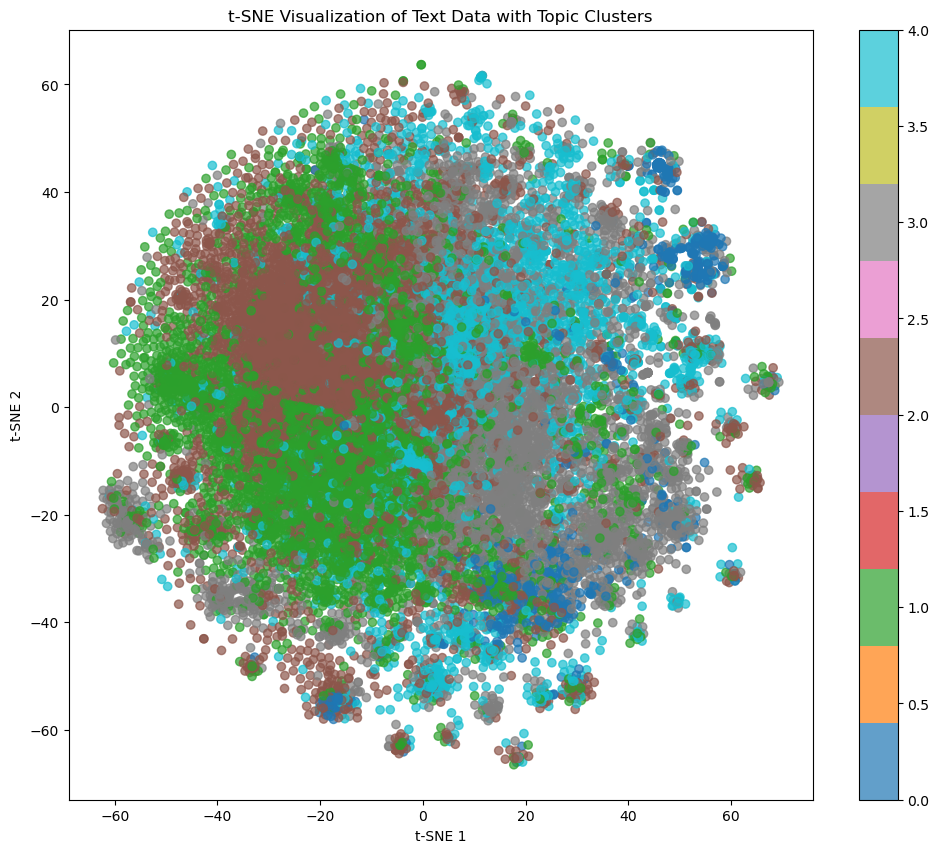

In [2]:
# !pip install --upgrade jupyter jupyterlab matplotlib

# import matplotlib
# matplotlib.use('Agg')

# Step 5: Create a scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=np.argmax(topics, axis=1), cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title("t-SNE Visualization of Text Data with Topic Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show(block=True) 

## Other EDA

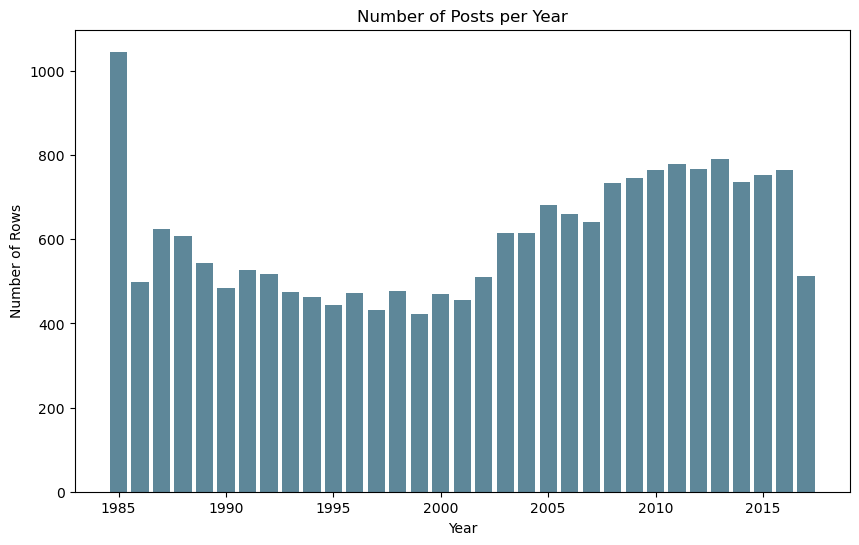

In [1]:
# !pip install --upgrade jupyter jupyterlab matplotlib

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/csv/raw_da_qs.csv')

year_counts = df['year'].value_counts().sort_index()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6), facecolor='none')
plt.bar(year_counts.index, year_counts.values, color="#5E8799")
plt.xlabel("Year")
plt.ylabel("Number of Rows")
plt.title("Number of Posts per Year")
plt.savefig("../website/images/eda/dear_abby_new_1.png", transparent=True, dpi=300)
plt.show()

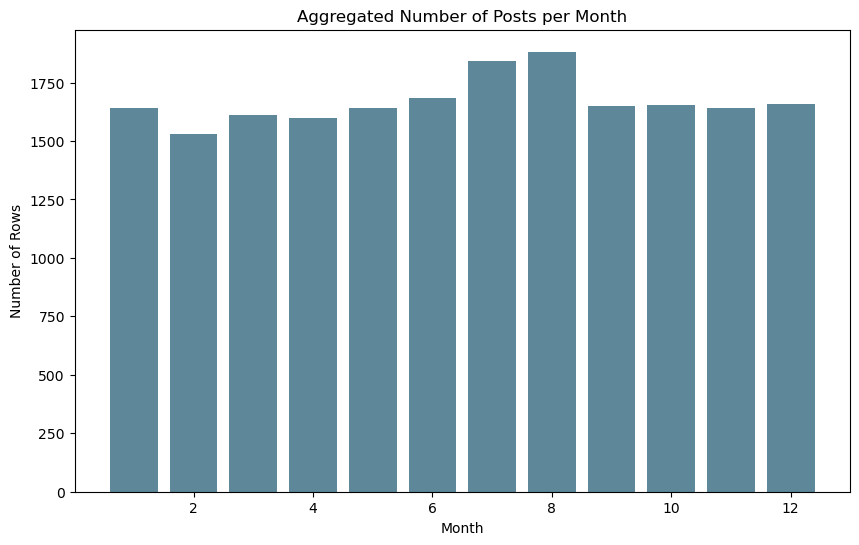

In [2]:
year_counts = df['month'].value_counts().sort_index()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6), facecolor='none')
plt.bar(year_counts.index, year_counts.values, color="#5E8799")
plt.xlabel("Month")
plt.ylabel("Number of Rows")
plt.title("Aggregated Number of Posts per Month")
plt.savefig("../website/images/eda/dear_abby_new_2.png", transparent=True, dpi=300)
plt.show()

In [14]:
df.head(10)

index  year  month day       url  \
0      0  1985    1.0  01  proquest   
1      1  1985    1.0  01  proquest   
2      2  1985    1.0  02  proquest   
3      3  1985    1.0  03  proquest   
4      4  1985    1.0  04  proquest   
5      5  1985    1.0  04  proquest   
6      6  1985    1.0  04  proquest   
7      7  1985    1.0  04  proquest   
8      8  1985    1.0  06  proquest   
9      9  1985    1.0  06  proquest   

                                               title  letterId  \
0  WOMAN NEEDS HELP: HER BURDEN OF HOPELESSNESS I...         1   
1  WOMAN NEEDS HELP: HER BURDEN OF HOPELESSNESS I...         1   
2   LAMENT ABOUT OLD AGE AND SICKNESS IS ILL-ADVISED         1   
3             'NORMAL' WIDOW HAS AN EYE FOR THE GUYS         1   
4  IT'S WISE TO BE WARY WHEN A STRANGER COMES TO ...         1   
5  IT'S WISE TO BE WARY WHEN A STRANGER COMES TO ...         1   
6  IT'S WISE TO BE WARY WHEN A STRANGER COMES TO ...         1   
7  IT'S WISE TO BE WARY WHEN A STRANGER COMES TO ...         1   
8         FRIENDLY JOGGER KNEW WHEN TO SLOW THE PACE         1   
9         FRIENDLY JOGGER KNEW WHEN TO SLOW THE PACE         1   

                                       question_only  
0  i have been in a bad marriage for 40 years. i ...  
1  this is for all newspaper carriers, mail carri...  
2  our 16-year-old son recently was placed in a s...  
3  i was a happy, respectable wife for 40 years, ...  
4  you be the judge: last night about 7 p.m. i wa...  
5  a further word about taking children out of sc...  
6  first one grandma says, "marriage is the price...  
7  like a lot of other people, the only time i wr...  
8  it all started one day while i was walking to ...  
9  my son hasn't had a decent meal since he marri...

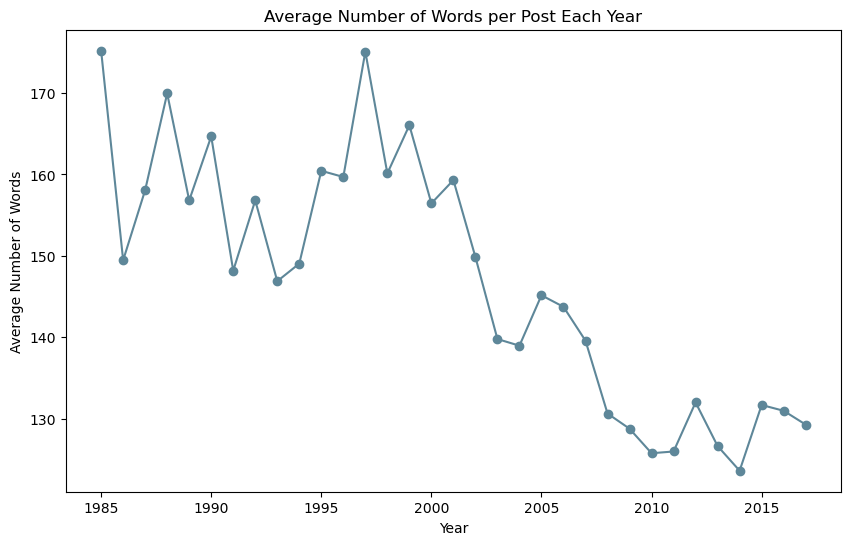

In [3]:

df['word_count'] = df['question_only'].apply(lambda x: len(str(x).split()))

average_word_count_per_year = df.groupby('year')['word_count'].mean()

plt.figure(figsize=(10, 6), facecolor='none')
plt.plot(average_word_count_per_year.index, average_word_count_per_year.values, marker='o', linestyle='-', color='#5E8799')
plt.title('Average Number of Words per Post Each Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Words')
plt.savefig("../website/images/eda/dear_abby_new_3.png", transparent=True, dpi=300)
plt.show()

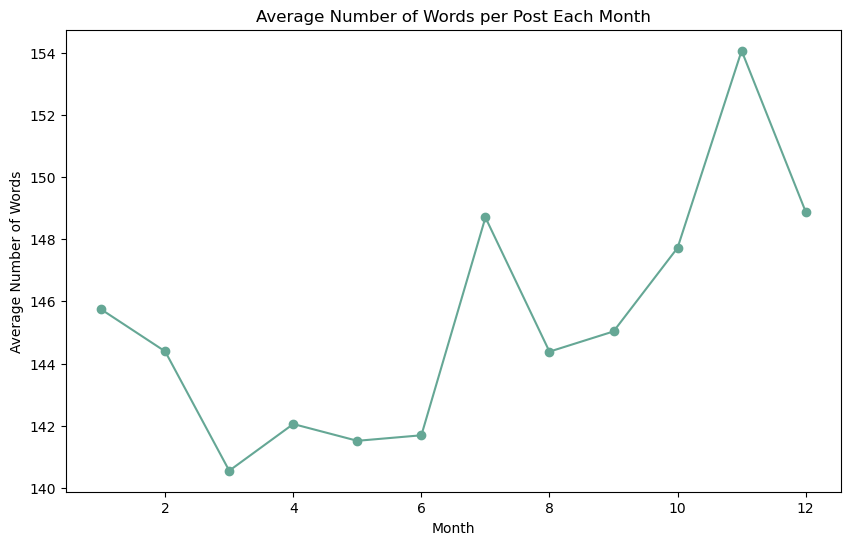

In [4]:
df['word_count'] = df['question_only'].apply(lambda x: len(str(x).split()))

average_word_count_per_year = df.groupby('month')['word_count'].mean()

plt.figure(figsize=(10, 6), facecolor='none')
plt.plot(average_word_count_per_year.index, average_word_count_per_year.values, marker='o', linestyle='-', color='#65A795')
plt.title('Average Number of Words per Post Each Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Words')
plt.savefig("../website/images/eda/dear_abby_new_4.png", transparent=True, dpi=300)
plt.show()

# Topic analysis in a 5-years iteration

In [11]:
import pandas as pd
import random

# Load the CSV file
df = pd.read_csv('./../data/csv/raw_da_qs.csv')

# Define 5-year intervals from 1985 to 2017
bins = list(range(1985, 2022, 5))  # [1985, 1990, 1995, ..., 2015, 2020]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

# Create a new column "interval" based on the 5-year intervals
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Initialize a dictionary to store the corpuses for each 5-year interval
corpus_dict = {}

# Process text data and separate into individual corpuses for each interval
for interval, group_df in df.groupby('interval'):
    text_data = []
    for line in group_df['question_only']: 
        tokens = prepare_text_for_lda(line)
        if random.random() > 0.99:  
            print(tokens)
        text_data.append(tokens)
    
    # Store the processed text data for the current interval
    corpus_dict[interval] = text_data

# Example: Access corpus for the interval "1985-1989"
print("Corpus for 1985-1989:", corpus_dict["1985-1989"])

/tmp/ipykernel_3149/395845367.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for interval, group_df in df.groupby('interval'):


['prime', 'never', 'without', 'joke', 'without', 'excuse', 'without', 'ridicule', 'regrets', 'consent', 'adult', 'monday', 'powerful', 'story', 'happen', 'middle', 'class', 'family', 'college', 'tell', 'parent', 'mother', 'homosexual', 'change', 'barry', 'change', 'father', 'martin', 'sheen', 'person', 'always', 'accept', 'prefer', 'counter', 'scream', 'mother', 'marlo', 'thomas', 'want', 'acceptance', 'cure', 'anguish', 'struggle', 'result', 'speak', 'million', 'bring', 'taste', 'concern', 'adult', 'bring', 'nuclear', 'fryface', 'father', 'daughter', 'incest', 'something', 'amelia', 'first', 'try', 'project', 'producer', 'aghayan', 'would', 'touch', 'aghayan', 'try', 'career', 'change', 'costume', 'designer', 'applause', 'funny', 'sing', 'blues', 'producer', 'first', 'project', 'optioned', 'laura', 'hobson', 'consent', 'adult', 'coming', 'painful', 'journey', 'acceptance', 'write', 'gentleman', 'agreement', 'great', 'movie', 'award', 'decide', 'consent', 'adult', 'aghayan', 'thought',

In [12]:
!pip install gensim
from gensim import corpora
import pickle

for interval, text_data in corpus_dict.items():
    print(f"Processing interval: {interval}")

    dictionary = corpora.Dictionary(text_data)
    
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    corpus_filename = f'corpus_{interval}.pkl'
    dictionary_filename = f'dictionary_{interval}.gensim'

    pickle.dump(corpus, open(corpus_filename, 'wb'))
    dictionary.save(dictionary_filename)

    print(f"Saved corpus to {corpus_filename} and dictionary to {dictionary_filename}")

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Processing interval: 1985-1989
Saved corpus to corpus_1985-1989.pkl and dictionary to dictionary_1985-1989.gensim
Processing interval: 1990-1994
Saved corpus to corpus_1990-1994.pkl and dictionary to dictionary_1990-1994.gensim
Processing interval: 1995-1999
Saved corpus to corpus_1995-1999.pkl and dictionary to dictionary_1995-1999.gensim
Processing interval: 2000-2004
Saved corpus to corpus_2000-2004.pkl and dictionary to dictionary_2000-2004.gensim
Processing interval: 2005-2009
Saved corpus to corpus_2005-2009.pkl and dictionary to dictionary_2005-2009.gensim
Processing interval: 2010-2014
Saved corpus to corpus_2010-2014.pkl and dictionary to dictionary_2010-2014.gensim
Processing interval: 2015-2019
Saved corpus to corpus_2015-2019.pkl and dictionary to dictionary_2015-2019.gensim


In [13]:
import gensim
from gensim import corpora

NUM_TOPICS = 3

# Iterate through each interval (key) and its corresponding text data (value) in `corpus_dict`
for interval, text_data in corpus_dict.items():
    print(f"Processing LDA for interval: {interval}")

    # Load the dictionary and corpus for the current interval
    dictionary_filename = f'dictionary_{interval}.gensim'
    corpus_filename = f'corpus_{interval}.pkl'

    dictionary = corpora.Dictionary.load(dictionary_filename)
    corpus = pickle.load(open(corpus_filename, 'rb'))

    # Train LDA model for the current interval
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        num_topics=NUM_TOPICS,
        id2word=dictionary,
        passes=15
    )

    # Save the LDA model
    model_filename = f'lda_model_{interval}.gensim'
    ldamodel.save(model_filename)

    # Print the topics for the current interval
    print(f"Topics for interval {interval}:")
    topics = ldamodel.print_topics(num_words=8)
    for topic in topics:
        print(topic)

    print("\n" + "-"*50 + "\n")


Processing LDA for interval: 1985-1989
Topics for interval 1985-1989:
(0, '0.013*"would" + 0.013*"husband" + 0.012*"child" + 0.012*"years" + 0.011*"mother" + 0.010*"friend" + 0.009*"married" + 0.008*"think"')
(1, '0.011*"would" + 0.010*"years" + 0.009*"people" + 0.008*"child" + 0.008*"woman" + 0.007*"write" + 0.007*"money" + 0.006*"address"')
(2, '0.008*"would" + 0.006*"people" + 0.005*"woman" + 0.004*"american" + 0.003*"state" + 0.003*"animal" + 0.003*"public" + 0.003*"could"')

--------------------------------------------------

Processing LDA for interval: 1990-1994
Topics for interval 1990-1994:
(0, '0.012*"people" + 0.006*"would" + 0.005*"please" + 0.005*"could" + 0.004*"think" + 0.004*"person" + 0.004*"problem" + 0.004*"rooster"')
(1, '0.015*"would" + 0.014*"husband" + 0.014*"child" + 0.014*"years" + 0.010*"mother" + 0.009*"married" + 0.009*"woman" + 0.008*"never"')
(2, '0.010*"would" + 0.008*"people" + 0.005*"mother" + 0.005*"write" + 0.005*"child" + 0.005*"years" + 0.004*"frien

Processing LDA for interval: 1985-1989


Topics for interval 1985-1989:
(0, '0.013*"animal" + 0.006*"elliott" + 0.004*"water" + 0.004*"chris" + 0.003*"linklater" + 0.003*"denture" + 0.003*"please" + 0.003*"letterman"')
(1, '0.015*"years" + 0.015*"woman" + 0.014*"would" + 0.012*"husband" + 0.009*"never" + 0.009*"married" + 0.008*"think" + 0.008*"friend"')
(2, '0.007*"people" + 0.006*"smoking" + 0.006*"angeles" + 0.006*"american" + 0.006*"smoke" + 0.006*"woman" + 0.006*"cancer" + 0.005*"write"')
(3, '0.018*"child" + 0.016*"would" + 0.014*"wedding" + 0.011*"mother" + 0.010*"years" + 0.009*"husband" + 0.008*"family" + 0.008*"parent"')
(4, '0.011*"booklet" + 0.011*"address" + 0.010*"write" + 0.009*"order" + 0.009*"people" + 0.009*"check" + 0.008*"money" + 0.007*"permission"')


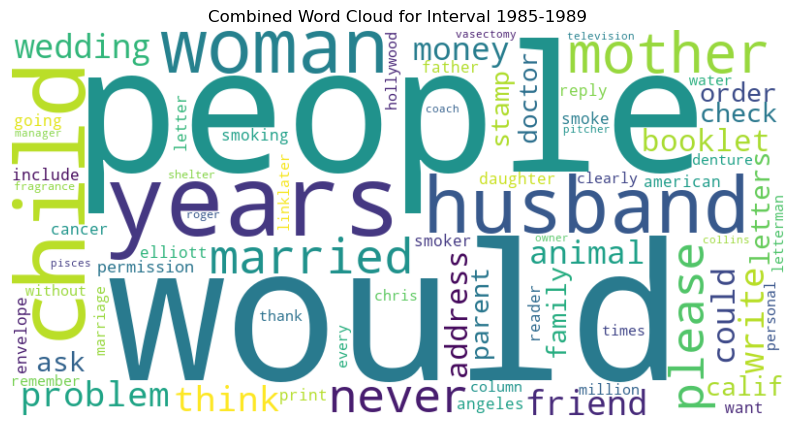


--------------------------------------------------

Processing LDA for interval: 1990-1994
Topics for interval 1990-1994:
(0, '0.009*"would" + 0.009*"people" + 0.008*"thank" + 0.008*"please" + 0.008*"woman" + 0.005*"could" + 0.005*"remember" + 0.004*"years"')
(1, '0.015*"people" + 0.006*"forgive" + 0.005*"family" + 0.005*"reader" + 0.005*"write" + 0.004*"years" + 0.004*"could" + 0.004*"would"')
(2, '0.012*"child" + 0.010*"people" + 0.009*"would" + 0.008*"think" + 0.006*"please" + 0.005*"years" + 0.004*"every" + 0.004*"little"')
(3, '0.018*"would" + 0.016*"husband" + 0.015*"years" + 0.015*"child" + 0.013*"mother" + 0.010*"married" + 0.009*"friend" + 0.008*"never"')
(4, '0.013*"people" + 0.013*"address" + 0.012*"order" + 0.009*"envelope" + 0.008*"check" + 0.008*"rooster" + 0.006*"booklet" + 0.006*"letter"')


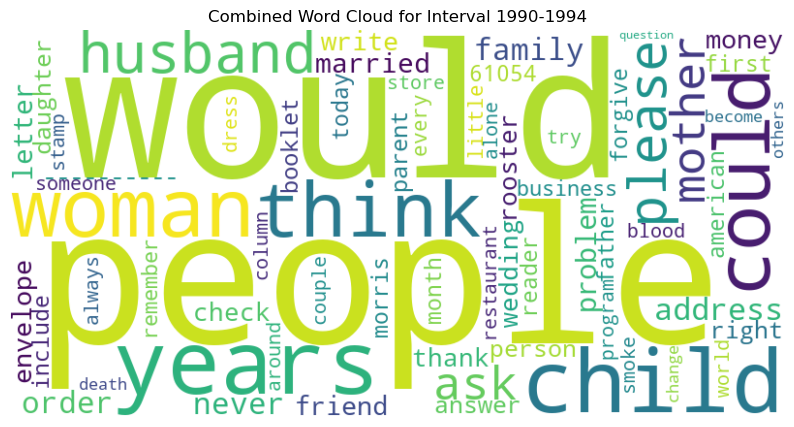


--------------------------------------------------

Processing LDA for interval: 1995-1999
Topics for interval 1995-1999:
(0, '0.014*"years" + 0.013*"mother" + 0.010*"wedding" + 0.009*"friend" + 0.009*"would" + 0.008*"woman" + 0.008*"never" + 0.008*"married"')
(1, '0.019*"husband" + 0.019*"child" + 0.016*"years" + 0.014*"mother" + 0.012*"would" + 0.011*"family" + 0.011*"parent" + 0.011*"married"')
(2, '0.014*"people" + 0.012*"would" + 0.009*"child" + 0.008*"could" + 0.006*"doctor" + 0.005*"husband" + 0.005*"parent" + 0.005*"family"')
(3, '0.014*"address" + 0.014*"problem" + 0.014*"please" + 0.013*"calif" + 0.013*"personal" + 0.012*"reply" + 0.011*"writing" + 0.011*"angeles"')
(4, '0.013*"would" + 0.012*"friend" + 0.010*"woman" + 0.009*"years" + 0.008*"people" + 0.006*"letter" + 0.006*"please" + 0.006*"think"')


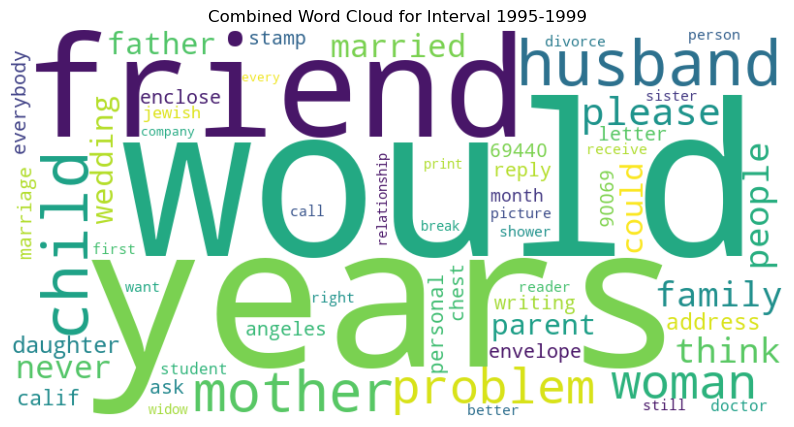


--------------------------------------------------

Processing LDA for interval: 2000-2004
Topics for interval 2000-2004:
(0, '0.016*"mother" + 0.016*"child" + 0.015*"family" + 0.014*"would" + 0.013*"husband" + 0.011*"parent" + 0.011*"friend" + 0.010*"think"')
(1, '0.018*"daughter" + 0.009*"would" + 0.008*"husband" + 0.008*"wedding" + 0.007*"mother" + 0.007*"think" + 0.007*"woman" + 0.005*"ask"')
(2, '0.011*"people" + 0.008*"would" + 0.008*"friend" + 0.007*"child" + 0.007*"school" + 0.006*"please" + 0.006*"thank" + 0.005*"party"')
(3, '0.018*"years" + 0.015*"married" + 0.013*"child" + 0.012*"husband" + 0.011*"month" + 0.010*"would" + 0.009*"marriage" + 0.008*"relationship"')
(4, '0.013*"friend" + 0.009*"years" + 0.009*"people" + 0.008*"husband" + 0.007*"think" + 0.007*"would" + 0.007*"mother" + 0.006*"always"')


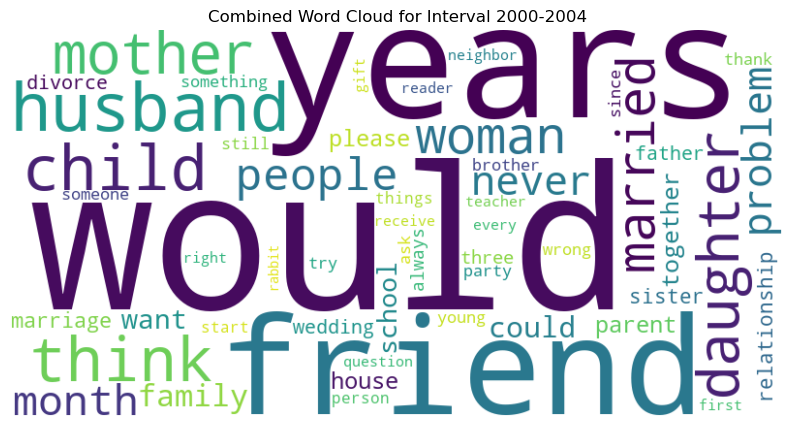


--------------------------------------------------

Processing LDA for interval: 2005-2009
Topics for interval 2005-2009:
(0, '0.026*"wedding" + 0.013*"party" + 0.011*"friend" + 0.011*"invite" + 0.010*"would" + 0.009*"guest" + 0.009*"birthday" + 0.009*"gift"')
(1, '0.015*"mother" + 0.014*"would" + 0.012*"years" + 0.009*"husband" + 0.009*"never" + 0.008*"woman" + 0.007*"think" + 0.007*"problem"')
(2, '0.021*"child" + 0.017*"husband" + 0.012*"would" + 0.011*"years" + 0.010*"mother" + 0.010*"parent" + 0.009*"family" + 0.008*"daughter"')
(3, '0.019*"people" + 0.008*"question" + 0.007*"would" + 0.007*"someone" + 0.005*"person" + 0.005*"answer" + 0.005*"please" + 0.005*"think"')
(4, '0.023*"friend" + 0.015*"years" + 0.012*"family" + 0.011*"think" + 0.009*"would" + 0.008*"never" + 0.007*"husband" + 0.007*"relationship"')


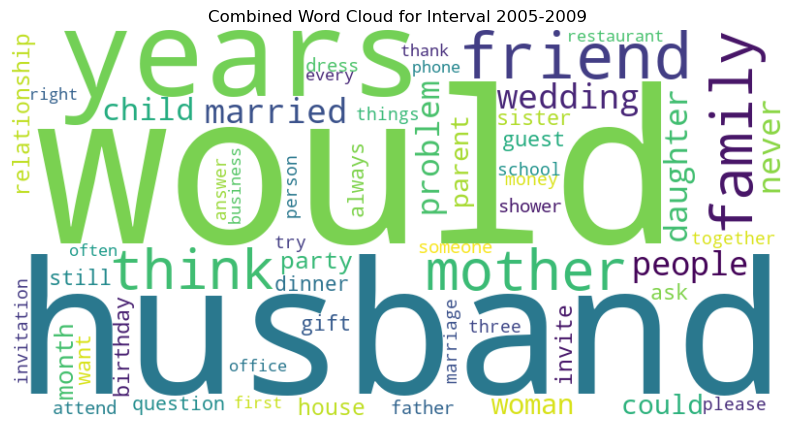


--------------------------------------------------

Processing LDA for interval: 2010-2014
Topics for interval 2010-2014:
(0, '0.020*"years" + 0.014*"friend" + 0.012*"woman" + 0.012*"husband" + 0.009*"would" + 0.009*"relationship" + 0.008*"married" + 0.008*"think"')
(1, '0.012*"people" + 0.008*"dinner" + 0.008*"friend" + 0.006*"would" + 0.006*"husband" + 0.005*"table" + 0.005*"restaurant" + 0.005*"someone"')
(2, '0.011*"friend" + 0.009*"people" + 0.009*"would" + 0.007*"woman" + 0.006*"could" + 0.006*"someone" + 0.005*"person" + 0.005*"ask"')
(3, '0.020*"would" + 0.019*"wedding" + 0.014*"family" + 0.014*"think" + 0.010*"husband" + 0.009*"friend" + 0.009*"party" + 0.008*"birthday"')
(4, '0.019*"child" + 0.014*"years" + 0.012*"husband" + 0.010*"parent" + 0.009*"family" + 0.009*"daughter" + 0.009*"would" + 0.009*"mother"')


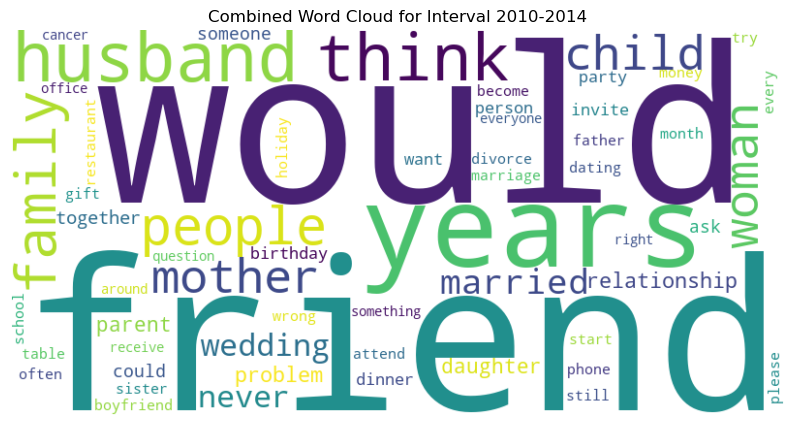


--------------------------------------------------

Processing LDA for interval: 2015-2019
Topics for interval 2015-2019:
(0, '0.022*"child" + 0.020*"want" + 0.017*"relationship" + 0.016*"family" + 0.015*"would" + 0.014*"husband" + 0.014*"daughter" + 0.012*"years"')
(1, '0.017*"something" + 0.016*"people" + 0.015*"check" + 0.014*"lunch" + 0.013*"recently" + 0.013*"would" + 0.010*"years" + 0.009*"living"')
(2, '0.028*"would" + 0.026*"sister" + 0.015*"attend" + 0.013*"parent" + 0.012*"house" + 0.012*"church" + 0.012*"dress" + 0.011*"understand"')
(3, '0.019*"friend" + 0.014*"never" + 0.014*"family" + 0.014*"think" + 0.013*"school" + 0.013*"someone" + 0.012*"college" + 0.011*"child"')
(4, '0.025*"years" + 0.017*"together" + 0.012*"friend" + 0.010*"still" + 0.010*"parent" + 0.010*"mother" + 0.009*"married" + 0.009*"every"')


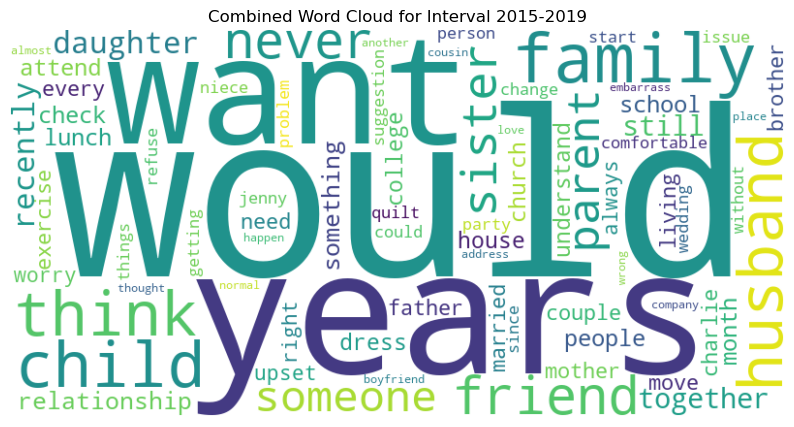


--------------------------------------------------



In [18]:
# !pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import gensim
from gensim import corpora
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict

NUM_TOPICS = 5

# Function to plot a word cloud for all topics combined in an interval
def plot_combined_wordcloud(lda_model, interval):
    plt.figure(figsize=(10, 6))
    
    # Combine word frequencies from all topics
    combined_words = defaultdict(float)
    for topic_num in range(NUM_TOPICS):
        topic_words = lda_model.show_topic(topic_num, topn=20)
        for word, weight in topic_words:
            combined_words[word] += weight
    
    # Generate word cloud from combined word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combined_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Combined Word Cloud for Interval {interval}")
    plt.show()

# Iterate through each interval in `corpus_dict`
for interval, text_data in corpus_dict.items():
    print(f"Processing LDA for interval: {interval}")

    # Load the dictionary and corpus for the current interval
    dictionary_filename = f'dictionary_{interval}.gensim'
    corpus_filename = f'corpus_{interval}.pkl'

    dictionary = corpora.Dictionary.load(dictionary_filename)
    corpus = pickle.load(open(corpus_filename, 'rb'))

    # Train LDA model for the current interval
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        num_topics=NUM_TOPICS,
        id2word=dictionary,
        passes=15
    )

    # Save the LDA model
    model_filename = f'lda_model_{interval}.gensim'
    ldamodel.save(model_filename)

    # Print the topics for the current interval
    print(f"Topics for interval {interval}:")
    topics = ldamodel.print_topics(num_words=8)
    for topic in topics:
        print(topic)

    # Plot combined word cloud for the interval
    plot_combined_wordcloud(ldamodel, interval)

    print("\n" + "-"*50 + "\n")


Over the years, the topics have shifted from discussions about family dynamics in the 1980s and 1990s to broader social and relationship issues in the 2000s and beyond. Early intervals (1985-1994) focused heavily on family roles, marriage, and parenting, reflecting traditional concerns about domestic life. By the late 1990s, themes expanded to include advice-seeking on personal problems, health, and social interactions. In the early 2000s, there was a noticeable shift towards discussions of relationships beyond the family, including friendships and social contexts. This period marked the beginning of a broader exploration of social issues.

From 2005 onwards, discussions became more nuanced, incorporating themes of marriage, modern relationship dynamics, and parenting challenges. By 2010, there was a strong focus on parenting and broader social interactions, with increased mentions of schools and social advice. The most recent years (2015-2017) show a significant shift towards personal aspirations, modern relationship struggles, and societal expectations, highlighting themes like desire, balance in relationships, and social pressures. Overall, the topics reflect an evolution from family-focused issues to a more diverse set of social and personal concerns, mirroring changing societal trends and expectations.

1985-1989: Early Discussions (Family and Social Issues)

1990-1994: Emphasis on Family Roles and Advice

1995-1999: More Specific Family Issues and Personal Problems

2000-2004: Relationships and Social Context

2005-2009: Focus on Marriage, Family, and Social Problems

2010-2014: Parenting and Broader Social Interactions

2015-2017: Modern Relationship Dynamics and Social Issues